Search image of label

In [16]:
import os
result=[]
def search(dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename):
                search(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.txt': 
                    print(full_filename)
                    result.append(full_filename)
    except PermissionError:
        pass

search("/home/lab/dataset/CK+_image/")

/home/lab/dataset/CK+_image/label/Emotion/S105/008/S105_008_00000010_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S158/002/S158_002_00000011_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S106/004/S106_004_00000008_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S106/002/S106_002_00000016_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S106/006/S106_006_00000011_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/005/S065_005_00000008_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/004/S065_004_00000028_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/002/S065_002_00000022_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S065/003/S065_003_00000022_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S132/005/S132_005_00000016_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S132/008/S132_008_00000010_emotion.txt
/home/lab/dataset/CK+_image/label/Emotion/S132/002/S132_002_00000018_emotion.txt
/home/lab/dataset/CK+_image/

In [17]:
len(result)

327

In [18]:
num_of_1=0
num_of_2=0
num_of_3=0
num_of_4=0
num_of_5=0
num_of_6=0
num_of_7=0
for i in range(len(result)):
    filename=result[i]
    with open(filename) as data:
        lines=data.readlines()
        data.close()
    num=int(lines[0][3])
    if num == 1:
        num_of_1+=1
    elif num == 2:
        num_of_2+=1
    elif num == 3:
        num_of_3+=1
    elif num == 4:
        num_of_4+=1
    elif num == 5:
        num_of_5+=1
    elif num == 6:
        num_of_6+=1
    elif num == 7:
        num_of_7+=1

In [19]:
num_of_1,num_of_2,num_of_3,num_of_4,num_of_5,num_of_6,num_of_7

(45, 18, 59, 25, 69, 28, 83)

In [20]:
num_of_1+num_of_2+num_of_3+num_of_4+num_of_5+num_of_6+num_of_7

327

In [21]:
import cv2
image_path='/home/lab/dataset/CK+_image/cohn-kanade-images'
input_data=[]
label=[]
for i in range(len(result)):
    new_image=result[i][-39:-12]
    label_image_path=image_path+new_image+'.png'
    img=plt.imread(label_image_path)
    if img.shape[-1]==3:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,dsize=(480,640),interpolation=cv2.INTER_AREA)
    input_data.append(img)
    filename=result[i]
    with open(filename) as data:
        lines=data.readlines()
        data.close()
    new_label=int(lines[0][3])
    label.append(new_label)

In [22]:
import numpy as np

In [23]:
input_data=np.array(input_data)
label=np.array(label)

In [24]:
input_data.shape, label.shape

((327, 640, 480), (327,))

In [25]:
def Visualization(input_data,label,index):
    Visual_image=input_data[index]
    Visual_label=label[index]
    plt.imshow(Visual_image)
    if Visual_label==1:
        title_n="anger"
    elif Visual_label==2:
        title_n="contemp"
    elif Visual_label==3:
        title_n="disgust"
    elif Visual_label==4:
        title_n="fear"
    elif Visual_label==5:
        title_n="happy"
    elif Visual_label==6:
        title_n="sad"
    elif Visual_label==7:
        title_n="Perhaps_surprise"
    plt.title(title_n)

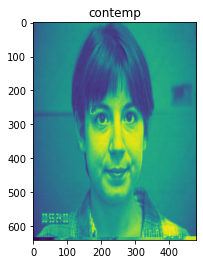

In [45]:
Visualization(input_data,label,20)

0 : neutral
1 : anger
2 : contemp
3 : disgust
4 : fear
5 : happy
6 : sad

In [36]:
np.save("CK+dataset.npy",input_data)
np.save("CK+label.npy",label)